In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import urllib
import bs4
import pandas
from urllib import request
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import pycountry 

# Droit des femmes et développement économique

# Importation et traitement de la base de la Banque mondiale

In [2]:
df_bm=pd.read_csv('WDIData.csv')
df_bm.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_bm2=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2019"]]
df_bm2.head(5)

,Country Code,Country Name,Indicator Name,Indicator Code,2019
0,AFE,Africa Eastern and Southern,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN
1,AFE,Africa Eastern and Southern,Access to electricity (% of population),EG.ELC.ACCS.ZS,43.640661
2,AFE,Africa Eastern and Southern,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,28.841150
3,AFE,Africa Eastern and Southern,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,73.589886
4,AFE,Africa Eastern and Southern,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN


# Importation et traitement de la base de l'OCDE

In [4]:
df_ocde=pd.read_csv('./oecd3.csv', sep=',', encoding='latin-1')
df_ocde.head(5)

,"ï»¿""REGION""",RÃ©gion,LOCATION,Pays,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
0,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_LAW,Loi,2019,2019,0.50,NaN,NaN
1,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_ATT,Attitudes,2019,2019,21.10,NaN,NaN
2,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
3,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_DV_LAW,Loi,2019,2019,0.00,NaN,NaN
4,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_IN_LAW,Loi,2019,2019,0.00,NaN,NaN


In [5]:
# on ne sélectionne que les lignes 'pratique' qui correspondent à la réalité des faits 
df_ocde2=df_ocde[df_ocde['Variable']=="Pratique"]
df_ocde2.rename(columns={'ï»¿"REGION"': 'region_monde', 'RÃ©gion': 'region', 'LOCATION': 'Country Code', 'Pays':'Country Name'}, inplace=True)
df_ocde2=df_ocde2[df_ocde2['region_monde']=="ALL"]
df_ocde2.head(5)

C:\Users\Ca1000\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,region_monde,region,Country Code,Country Name,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
29,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
34,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_VAW_PRACT,Pratique,2019,2019,16.90,NaN,NaN
36,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_MW_PRACT,Pratique,2019,2019,105.50,NaN,NaN
38,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_RA_PRACT,Pratique,2019,2019,11.00,NaN,NaN
42,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RAPFR_SAFS_PRACT,Pratique,2019,2019,50.00,NaN,NaN


In [6]:
# on ne sélectionne que les colonnes qui nous intéressent 
df_ocde3=df_ocde2[['Country Code', 'Country Name', 'VAR', 'Value']]
df_ocde3.head(5)

,Country Code,Country Name,VAR,Value
29,AUS,Australie,DF_HR_PRACT,1.82
34,AUS,Australie,RPI_VAW_PRACT,16.90
36,AUS,Australie,RPI_MW_PRACT,105.50
38,AUS,Australie,RPI_RA_PRACT,11.00
42,AUS,Australie,RAPFR_SAFS_PRACT,50.00


In [7]:
df_ocde3.shape

(3426, 4)

# Implémentation de la fonction de sélection des colonnes

In [8]:
def bm_select(Indicator, row_name):

    df=df_bm2[df_bm2['Indicator Name']==Indicator]["Country Code", "2019"]
    df.rename(columns={'2019':row_name}, inplace=True)
    
    return df

# Création de la base de données

## PIB

In [9]:
df_pib=df_bm2[df_bm2['Indicator Name']=="GDP per capita (constant 2015 US$)"]
df_pib=df_pib[["Country Name","2019", "Country Code"]]
df_pib.rename(columns={'2019': 'GDP per capita 2019'}, inplace=True)
df_pib

,Country Name,GDP per capita 2019,Country Code
469,Africa Eastern and Southern,1499.256275,AFE
1912,Africa Western and Central,1843.558468,AFW
3355,Arab World,6206.570758,ARB
4798,Caribbean small states,10050.327615,CSS
6241,Central Europe and the Baltics,14823.026908,CEB
...,...,...,...
377092,Virgin Islands (U.S.),NaN,VIR
378535,West Bank and Gaza,3378.434621,PSE
379978,"Yemen, Rep.",NaN,YEM
381421,Zambia,1348.743220,ZMB


In [10]:
#df_pib2[values]=bm_select(Indicator="GDP per capita (constant 2015 US$)", row_name=values)

## Indicateur famille (F)

Scrapper le taux de fertilité


In [11]:
df_taux_fertilité=pd.read_csv('data_natalité.csv')
df_taux_fertilité.rename(columns={'Fertility Rate   In 2019 (Births/Woman)': 'Fertility'}, inplace=True)
df_taux_fertilité.head(5)

,Country Name,Fertility
0,Niger,6.824
1,Somalia,5.978
2,DR Congo,5.819
3,Mali,5.785
4,Chad,5.649


In [12]:
#Fonction pour donnner le nom de code du pays des pays scrappés pour le taux de fertilité 
def code_pays(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 est utilisé pour donner le code en 3 lettres du pays
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE# create a column for code 
df_taux_fertilité['CODE']=code_pays(df_taux_fertilité["Country Name"])
df_taux_fertilité.head()

,Country Name,Fertility,CODE
0,Niger,6.824,NER
1,Somalia,5.978,SOM
2,DR Congo,5.819,None
3,Mali,5.785,MLI
4,Chad,5.649,TCD


In [13]:
df_taux_fertilité.rename(columns={'CODE': 'Country Code'}, inplace=True)

In [14]:
df_famille=df_taux_fertilité.merge(df_pib, on='Country Code', how='outer')
df_famille

,Country Name_x,Fertility,Country Code,Country Name_y,GDP per capita 2019
0,Niger,6.824,NER,Niger,523.658778
1,Somalia,5.978,SOM,Somalia,289.278592
2,DR Congo,5.819,None,NaN,NaN
3,Tanzania,4.832,None,NaN,NaN
4,Ivory Coast,4.593,None,NaN,NaN
...,...,...,...,...,...
352,NaN,NaN,TLS,Timor-Leste,1435.728071
353,NaN,NaN,VEN,"Venezuela, RB",NaN
354,NaN,NaN,VNM,Vietnam,2604.224166
355,NaN,NaN,VIR,Virgin Islands (U.S.),NaN


In [15]:
#Nettoyage du dataframe : on supprime les Nan,les valeurs (-) ainsi que 
#les données qui ne sont pas conformes au format que l'on va étudier
"""
indexNames = df_famille[ df_famille['Fertility'] == '-' ].index
# Delete these row indexes from dataFrame
df_famille.drop(indexNames , inplace=True)
indexNames2 = df_famille[ df_famille['Fertility'] == '1.3 (2010)' ].index
# Delete these row indexes from dataFrame
df_famille.drop(indexNames2 , inplace=True)
indexNames3 = df_famille[ df_famille['Fertility'] == '1.9 (2003)' ].index
# Delete these row indexes from dataFrame
df_famille.drop(indexNames3 , inplace=True)
indexNames4 = df_famille[ df_famille['Fertility'] == '4.0 (2011)' ].index
# Delete these row indexes from dataFrame
df_famille.drop(indexNames4 , inplace=True)
indexNames5 = df_famille[ df_famille['Fertility'] == '2.2 (2015)' ].index
# Delete these row indexes from dataFrame
df_famille.drop(indexNames5 , inplace=True)
indexNames6 = df_famille[ df_famille['Fertility'] == '1.3 (2012)' ].index
# Delete these row indexes from dataFrame
df_famille.drop(indexNames6 , inplace=True)
indexNames7 = df_famille[ df_famille['Fertility'] == '2.1 (2002)' ].index
# Delete these row indexes from dataFrame
df_famille.drop(indexNames7 , inplace=True)
"""

"\nindexNames = df_famille[ df_famille['Fertility'] == '-' ].index\n# Delete these row indexes from dataFrame\ndf_famille.drop(indexNames , inplace=True)\nindexNames2 = df_famille[ df_famille['Fertility'] == '1.3 (2010)' ].index\n# Delete these row indexes from dataFrame\ndf_famille.drop(indexNames2 , inplace=True)\nindexNames3 = df_famille[ df_famille['Fertility'] == '1.9 (2003)' ].index\n# Delete these row indexes from dataFrame\ndf_famille.drop(indexNames3 , inplace=True)\nindexNames4 = df_famille[ df_famille['Fertility'] == '4.0 (2011)' ].index\n# Delete these row indexes from dataFrame\ndf_famille.drop(indexNames4 , inplace=True)\nindexNames5 = df_famille[ df_famille['Fertility'] == '2.2 (2015)' ].index\n# Delete these row indexes from dataFrame\ndf_famille.drop(indexNames5 , inplace=True)\nindexNames6 = df_famille[ df_famille['Fertility'] == '1.3 (2012)' ].index\n# Delete these row indexes from dataFrame\ndf_famille.drop(indexNames6 , inplace=True)\nindexNames7 = df_famille[ df_f

In [16]:
def cleaner (char: str):
    assert type(char)==str, "The row does not contains str"
    if '-' in char: return np.NaN
    elif '(' in char:
        i=0
        while char[i+1]!= '(':
            i+=1
        return float(char[:i])
    else: return float(char)

In [17]:
df_famille.dropna(inplace=True)
df_famille["Fertility"]=df_famille["Fertility"].apply(cleaner)
df_famille.dropna(inplace=True)
df_famille["Fertility"]

0      6.824
1      5.978
92     5.785
93     5.649
94     5.442
       ...  
254    1.900
255    4.000
258    2.200
259    1.300
260    2.100
Name: Fertility, Length: 165, dtype: float64

In [18]:
df_famille2=df_famille

In [19]:
#Jusqu'à présent le taux de fertilité était pris en compte comme une chaîne de caractère
#On la convertit donc en nombres
#df_famille2["Fertility"] = pd.to_numeric(df_famille2["Fertility"])

In [20]:
df_famille2["Fertility indicator"]=100-df_famille2["Fertility"]
df_famille2["Indicateur famille"]=df_famille2["Fertility indicator"]/df_famille2["Fertility indicator"].max()

In [21]:
df_famille2

,Country Name_x,Fertility,Country Code,Country Name_y,GDP per capita 2019,Fertility indicator,Indicateur famille
0,Niger,6.824,NER,Niger,523.658778,93.176,0.942123
1,Somalia,5.978,SOM,Somalia,289.278592,94.022,0.950677
92,Mali,5.785,MLI,Mali,815.454597,94.215,0.952629
93,Chad,5.649,TCD,Chad,660.069929,94.351,0.954004
94,Angola,5.442,AGO,Angola,3458.650512,94.558,0.956097
...,...,...,...,...,...,...,...
254,Dominica,1.900,DMA,Dominica,7617.846091,98.100,0.991911
255,Marshall Islands,4.000,MHL,Marshall Islands,3595.208450,96.000,0.970677
258,Palau,2.200,PLW,Palau,15213.715905,97.800,0.988878
259,San Marino,1.300,SMR,San Marino,44709.458767,98.700,0.997978


In [22]:
df_famille2=df_famille2[["Country Code", "Indicateur famille"]]
df_famille2

,Country Code,Indicateur famille
0,NER,0.942123
1,SOM,0.950677
92,MLI,0.952629
93,TCD,0.954004
94,AGO,0.956097
...,...,...
254,DMA,0.991911
255,MHL,0.970677
258,PLW,0.988878
259,SMR,0.997978


En utilisant la technique avec le Code on obtient 159 valeurs au total contre 171 quand on faisait avec Country Name donc il y a potentiellement des mismatch --> problématique ?

In [23]:
df_famille2["Indicateur famille"]=(df_famille2["Indicateur famille"]-df_famille2["Indicateur famille"].min())/(df_famille2["Indicateur famille"].max()-df_famille2["Indicateur famille"].min())
df_famille2

<ipython-input-23-912d49953be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famille2["Indicateur famille"]=(df_famille2["Indicateur famille"]-df_famille2["Indicateur famille"].min())/(df_famille2["Indicateur famille"].max()-df_famille2["Indicateur famille"].min())


,Country Code,Indicateur famille
0,NER,0.000000
1,SOM,0.147799
92,MLI,0.181516
93,TCD,0.205276
94,AGO,0.241440
...,...,...
254,DMA,0.860238
255,MHL,0.493361
258,PLW,0.807827
259,SMR,0.965059


In [24]:
df_famille2.set_index(["Country Code"], inplace=True)

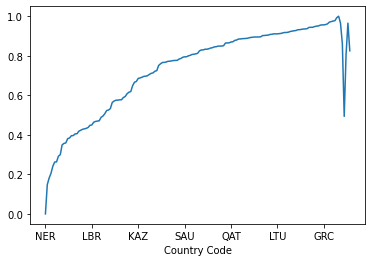

In [25]:
df_famille2["Indicateur famille"].plot()

## Indicateur santé (S)

Trois variables:
- Espérance de vie à la naissance pour les femmes (BM)
- Part des femmes non-enceintes anémiées (BM)
- Part des femmes séropositives (BM)

In [ ]:
df_esperance_de_vie= df_bm2[df_bm2['Indicator Code']=="SP.DYN.LE00.FE.IN"]
df_esperance_de_vie=df_esperance_de_vie[["Country Name","2019"]]
df_esperance_de_vie.rename(columns={'2019': 'Life expectancy of women at birth'}, inplace=True)
df_esperance_de_vie.head(5)

In [ ]:
df_anemia= df_bm2[df_bm2['Indicator Code']=="SH.ANM.NPRG.ZS"]
df_anemia=df_anemia[["Country Name", "2019"]]
df_anemia.rename(columns={'2019': 'Prevalence of anemia among non pregnant women'}, inplace=True)
df_anemia.head(5)

In [ ]:
df_hiv= df_bm2[df_bm2['Indicator Code']=="SH.DYN.AIDS.FE.ZS"]
df_hiv=df_hiv[["Country Name", "2019"]]
df_hiv.rename(columns={'2019': 'Women share of population living with HIV'}, inplace=True)
df_hiv.head(5)

In [ ]:
# On fusionne tout ça dans le df santé
df_sante=df_esperance_de_vie.merge(df_anemia, on='Country Name', how='left')
df_sante=df_sante.merge(df_hiv, on='Country Name', how='outer')
df_sante

### Construction de l'indicateur santé 

In [ ]:
df_sante=df_sante.merge(df_pib, on='Country Name', how='outer')
df_sante

In [ ]:
index_with_nan = df_sante.index[df_sante.isnull().any(axis=1)]
index_with_nan.shape
df_sante.drop(index_with_nan,0, inplace=True)

X = df_sante[["Life expectancy of women at birth", "Prevalence of anemia among non pregnant women", "Women share of population living with HIV"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_sante["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

Ne sont pris en compte ici que 155 observations, correspondants aux pays sans nan sur toute une ligne. Les résultats sont donc approximatifs pour l'ensemble de l'échantillon, constitué de 266 pays. Je décide de donner un poids différent aux variables dans la construction de mon indicateur, s'appuyant sur la significativité pratique et statistique de ces indicateurs. 
- l'espérance de vie à la naissance semble très significative et explicative. Je lui confère 3/4 de l'explication de l'indicateur
- la prévalence de l'anémie parmi les femmes pas enceintes: 2/12
- la part de femmes vivant avec le VIH: 1/12

In [ ]:
df_sante2=df_sante

In [ ]:
df_sante2["Share of np women living without anemia"]=100-df_sante2["Prevalence of anemia among non pregnant women"]
df_sante2["Share of np women living without HIV"]=100-df_sante2["Women share of population living with HIV"]

In [ ]:
df_sante2["Share of np women living without anemia indicator"]=df_sante2["Share of np women living without anemia"]/df_sante2["Share of np women living without anemia"].max()
df_sante2["Share of np women living without HIV indicator"]=df_sante2["Share of np women living without HIV"]/df_sante2["Share of np women living without HIV"].max()
df_sante2["Life expectancy of women at birth indicator"]=df_sante2["Life expectancy of women at birth"]/df_sante2["Life expectancy of women at birth"].max()

In [ ]:
df_sante2["Indicateur sante"]= 3/4 *df_sante2["Life expectancy of women at birth indicator"]+ 2/12*df_sante2["Share of np women living without anemia indicator"] + 1/12*df_sante2["Share of np women living without HIV indicator"]

In [ ]:
df_sante2=df_sante2[["Country Name", "Indicateur sante"]]
df_sante2

Ici, je viens de faire l'indicateur pour les pays sans nan. On laisse comme ça ou on essaie de créer une méthode pour prendre les nan aussi en compte? 

## Indicateur ressources économiques (RE)

Trois variables:
- part des femmes proprétaires d'un compte en banque (OCDE)
- partage des tâches domestiques (OCDE)
- variable pour mesurer les écarts de salaire avec les hommes 

In [ ]:
df_domestique=df_ocde3[df_ocde3['VAR']=="DF_HR_PRACT"]
df_domestique=df_domestique[['Country Name', "Value", "Country Code"]]
df_domestique.rename(columns={'Value': 'Domestic time ratio women on men'}, inplace=True)
df_domestique.head(5)

In [ ]:
df_banque=df_ocde3[df_ocde3['VAR']=="RAPFR_SAFS_PRACT"]
df_banque=df_banque[['Country Name', "Value", "Country Code"]]
df_banque.rename(columns={'Value': 'Women s share amoung bank account owners'}, inplace=True)
df_banque.head(5)

In [ ]:
# On fusionne tout ça dans le df ressources économiques
df_ressources_eco=df_domestique.merge(df_banque, on='Country Code', how='outer')
df_ressources_eco = df_ressources_eco.drop_duplicates()
df_ressources_eco

## Construction de l'indicateur ressources économiques

In [ ]:
df_ressources_eco=df_ressources_eco.merge(df_pib, on='Country Code', how='outer')
df_ressources_eco

In [ ]:
df_ressources_eco[df_ressources_eco['Country Name']=="Nigeria"]['Women s share amoung bank account owners']

In [ ]:
df_ressources_eco.dropna(inplace=True)

X = df_ressources_eco[["Domestic time ratio women on men", "Women s share amoung bank account owners"]]
X = sm.add_constant(X) 
y = df_ressources_eco["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

Les variables semblent assez pertinentes : l'hypothèse nulle est rejetée au seul de 5% pour les deux variables. Le R carré est assez faible mais cela montre néanmoins que les variables peuvent être prise en compte dans l'explication du capital du pays. 

Une augmentation d'une unité du ratio de temps domestique homme/femme a un impact négatif important sur le PIB par habitant tandis qu'une augmentation d'une unité de la proportion des femmes possédant un compte bancaire a un impact positif plus néglibeable sur le PIB par habitant du pays.

Au vu des résultats de la régression je décide de donner un facteur 7/10 au ratio du temps de travail domestique et 3/10 à la part des femmes possédant un compte bancaire. Je vais désormais rapporter mes données à une valeur entre 0 et 1. 

In [ ]:
df_ressources_eco2=df_ressources_eco

In [ ]:
df_ressources_eco2["Women's share amoung bank account owners indicator"]=df_ressources_eco2["Women s share amoung bank account owners"]/df_ressources_eco2["Women s share amoung bank account owners"].max()
df_ressources_eco2["Domestic time ratio women on men (quota)"]=100-df_ressources_eco2["Domestic time ratio women on men"]
df_ressources_eco2["Domestic time ratio women on men indicator"]=df_ressources_eco2["Domestic time ratio women on men (quota)"]/df_ressources_eco2["Domestic time ratio women on men (quota)"].max()

In [ ]:
df_ressources_eco2

In [ ]:
df_ressources_eco2["Indicateur ressources éco"]= 3/10 *df_ressources_eco2["Domestic time ratio women on men indicator"]+ 7/10*df_ressources_eco2["Women's share amoung bank account owners indicator"] 

In [ ]:
df_ressources_eco2=df_ressources_eco2[["Country Code", "Indicateur ressources éco"]]
df_ressources_eco2

In [ ]:
df_ressources_eco2["Indicateur ressources économiques"]=(df_ressources_eco2["Indicateur ressources éco"]-df_ressources_eco2["Indicateur ressources éco"].min())/(df_ressources_eco2["Indicateur ressources éco"].max()-df_ressources_eco2["Indicateur ressources éco"].min())

In [ ]:
df_ressources_eco2

In [ ]:
df_ressources_eco2["Indicateur ressources économiques"].plot()

## Indicateur éducation (E)

4 variables : 
- Adolescents out of school, female (% of female lower secondary school age) (BM)
- Adjusted net enrollment rate, primary, female (% of primary school age children) (à comparer avec les hommes) (BM)
- Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative) (à comparer avec les hommes) (BM)
- Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative) (à comparer avec les hommes) (BM)

In [ ]:
df_descolariation = df_bm2[df_bm2['Indicator Code']=="SE.SEC.UNER.LO.FE.ZS"]
df_descolariation = df_descolariation[["Country Name", "2019"]]
df_descolariation.rename(columns={'2019': 'Adolescents s share out of school, female' }, inplace=True)
df_descolariation.head(5)

In [ ]:
df_scolariation_primaire = 

In [ ]:
df_education_basique = df_bm2[df_bm2['Indicator Code']=="SE.SEC.CUAT.LO.FE.ZS"]
df_education_basique = df_education_basique[["Country Name", "2019"]]
df_education_basique.rename(columns={'2019': 'Women of 25+ who completed lower secondary'}, inplace=True)
df_education_basique.head(5)

In [ ]:
df_etude_sup = df_bm2[df_bm2['Indicator Code']=="SE.TER.CUAT.ST.FE.ZS"]
df_etude_sup = df_etude_sup[["Country Name", "2019"]]
df_etude_sup.rename(columns={'2019': 'Women of 25+ who completed short-cycle tertiary'}, inplace=True)
df_etude_sup.head(5)

## Indicateur autonomie du corps (AC)

In [ ]:
df_contraception=df_ocde3[df_ocde3['VAR']=="RPI_RA_PRACT"]
df_contraception=df_contraception[['Country Name','Country Code', "Value"]]
df_contraception.rename(columns={'Value': 'No contraception used without wanting having children'}, inplace=True)
df_contraception.head(5)

In [ ]:
df_violences=df_ocde3[df_ocde3['VAR']=="RPI_VAW_PRACT"]
df_violences=df_violences[['Country Name','Country Code', "Value"]]
df_violences.rename(columns={'Value': 'Physical and sexual violences on women'}, inplace=True)
df_violences.head(5)

In [ ]:
# Provient de la banque mondiale 2018 
df_bm3=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2018"]]

df_homicide= df_bm3[df_bm3['Indicator Code']=="VC.IHR.PSRC.FE.P5"]
df_homicide=df_homicide[["Country Name","Country Code", "2018"]]
df_homicide.rename(columns={'2018': 'Intentional homicides per 100,000 female'}, inplace=True)
df_homicide.head(5)

In [ ]:
# On fusionne tout ça dans le df autonomie du corps
df_autonomie_corps=df_contraception.merge(df_violences, on='Country Code', how='outer')
df_autonomie_corps=df_autonomie_corps.merge(df_homicide, on='Country Code', how='outer')
df_autonomie_corps = df_autonomie_corps.drop_duplicates()
df_autonomie_corps=df_autonomie_corps[["Country Name", "Country Code","No contraception used without wanting having children", "Physical and sexual violences on women", "Intentional homicides per 100,000 female" ]]
df_autonomie_corps.head(5)

### Construction de l'indicateur autonomie du corps

In [ ]:
df_autonomie_corps2=df_autonomie_corps.merge(df_pib, on='Country Name', how='outer')
df_autonomie_corps2

In [ ]:
df_autonomie_corps2=df_autonomie_corps2[["Country Name", "Country Code", "No contraception used without wanting having children", "Physical and sexual violences on women", "GDP per capita 2019"]]
df_autonomie_corps2

In [ ]:
index_with_nan = df_autonomie_corps2.index[df_autonomie_corps2.isnull().any(axis=1)]
index_with_nan.shape
df_autonomie_corps2.drop(index_with_nan,0, inplace=True)
df_autonomie_corps2

In [ ]:
index_with_nan = df_autonomie_corps2.index[df_autonomie_corps2.isnull().any(axis=1)]
index_with_nan.shape
df_autonomie_corps2.drop(index_with_nan,0, inplace=True)

X = df_autonomie_corps2[["No contraception used without wanting having children", "Physical and sexual violences on women"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_autonomie_corps2["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

Ne sont pris en compte ici que 131 observations, correspondants aux pays sans nan sur toute une ligne. Les résultats sont donc approximatifs pour l'ensemble de l'échantillon, constitué de 266 pays. Je décide de donner un poids différent aux variables dans la construction de mon indicateur, s'appuyant sur la significativité pratique et statistique de ces indicateurs. 
- la non utilisation de contraception au sein d'un couple: 2/3
- les violences physiques et sexuelles à l'encontre des femmes: 1/3
Je retire la variable intentional homicides, étant trop peu renseignée (70 valeurs environ)

In [ ]:
df_autonomie_corps2["Contraception used without wanting having children"]=100-df_autonomie_corps2["No contraception used without wanting having children"]
df_autonomie_corps2["No physical and sexual violences on women"]=100-df_autonomie_corps2["Physical and sexual violences on women"]

In [ ]:
df_autonomie_corps2["Contraception used without wanting having children indicator"]=df_autonomie_corps2["Contraception used without wanting having children"]/df_autonomie_corps2["Contraception used without wanting having children"].max()
df_autonomie_corps2["No physical and sexual violences on women indicator"]=df_autonomie_corps2["No physical and sexual violences on women"]/df_autonomie_corps2["No physical and sexual violences on women"].max()
df_autonomie_corps2

In [ ]:
df_autonomie_corps2["indicateur autonomie corps"]=2/3*df_autonomie_corps2["Contraception used without wanting having children indicator"] + 1/3*2/3*df_autonomie_corps2["No physical and sexual violences on women indicator"]
df_autonomie_corps3=df_autonomie_corps2[["Country Name", "Country Code", "indicateur autonomie corps"]]
df_autonomie_corps3

## Indicateur activité économique (AE)

6 variables: 
- Employment to population ratio, 15+, female (%) (national estimate)
- Unemployment, female (% of female labor force) (modeled ILO estimate) (à comparer avec les hommes)
- Vulnerable employment, female (% of female employment) (modeled ILO estimate) (à comparer avec les hommes)
- Part time employement (à comparer avec les hommes)
- Employers, female (% of female employment) (modeled ILO estimate)
- Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)


In [27]:
df_employment= df_bm2[df_bm2['Indicator Code']=="SL.EMP.TOTL.SP.FE.NE.ZS"]
df_employment=df_employment[["Country Name", "2019"]]
df_employment.rename(columns={'2019': 'Employment to population ratio, 15+, female'}, inplace=True)
df_employment.head(5)

,Country Name,"Employment to population ratio, 15+, female"
368,Africa Eastern and Southern,NaN
1811,Africa Western and Central,NaN
3254,Arab World,NaN
4697,Caribbean small states,NaN
6140,Central Europe and the Baltics,47.164873


In [28]:
df_unemploymentF= df_bm2[df_bm2['Indicator Code']=="SL.UEM.TOTL.FE.ZS"]
df_unemploymentF=df_unemploymentF[["Country Name", "2019"]]
df_unemploymentF.rename(columns={'2019': 'Unemployment, female'}, inplace=True)
df_unemploymentF.head(5)

,Country Name,"Unemployment, female"
1397,Africa Eastern and Southern,6.913878
2840,Africa Western and Central,5.537050
4283,Arab World,19.869790
5726,Caribbean small states,9.705220
7169,Central Europe and the Baltics,3.853870


In [29]:
df_unemploymentM= df_bm2[df_bm2['Indicator Code']=="SL.UEM.TOTL.MA.ZS"]
df_unemploymentM=df_unemploymentM[["Country Name", "2019"]]
df_unemploymentM.rename(columns={'2019': 'Unemployment, male'}, inplace=True)
df_unemploymentM.head(5)

,Country Name,"Unemployment, male"
1399,Africa Eastern and Southern,6.073360
2842,Africa Western and Central,6.241559
4285,Arab World,7.736827
5728,Caribbean small states,6.710729
7171,Central Europe and the Baltics,3.720122


In [30]:
df_vulnerableF= df_bm2[df_bm2['Indicator Code']=="SL.EMP.VULN.FE.ZS"]
df_vulnerableF=df_vulnerableF[["Country Name", "2019"]]
df_vulnerableF.rename(columns={'2019': 'Vulnerable job, female'}, inplace=True)
df_vulnerableF

,Country Name,"Vulnerable job, female"
1421,Africa Eastern and Southern,76.909892
2864,Africa Western and Central,85.851676
4307,Arab World,30.901810
5750,Caribbean small states,22.670234
7193,Central Europe and the Baltics,11.992339
...,...,...
378044,Virgin Islands (U.S.),3.290000
379487,West Bank and Gaza,20.000000
380930,"Yemen, Rep.",60.650002
382373,Zambia,81.970001


In [31]:
df_vulnerableM= df_bm2[df_bm2['Indicator Code']=="SL.EMP.VULN.MA.ZS"]
df_vulnerableM=df_vulnerableM[["Country Name", "2019"]]
df_vulnerableM.rename(columns={'2019': 'Vulnerable job, male'}, inplace=True)
df_vulnerableM

,Country Name,"Vulnerable job, male"
1422,Africa Eastern and Southern,63.898302
2865,Africa Western and Central,72.743464
4308,Arab World,24.518884
5751,Caribbean small states,30.247118
7194,Central Europe and the Baltics,16.326178
...,...,...
378045,Virgin Islands (U.S.),3.290000
379488,West Bank and Gaza,22.420000
380931,"Yemen, Rep.",47.120000
382374,Zambia,65.240001


In [32]:
df_part_time= df_bm2[df_bm2['Indicator Code']=="SL.TLF.PART.FE.ZS"]
df_part_time=df_part_time[["Country Name", "2019"]]
df_part_time.rename(columns={'2019': 'Women part time'}, inplace=True)
df_part_time.head(5)

,Country Name,Women part time
951,Africa Eastern and Southern,NaN
2394,Africa Western and Central,NaN
3837,Arab World,NaN
5280,Caribbean small states,NaN
6723,Central Europe and the Baltics,27.606276


In [33]:
df_part_time_men= df_bm2[df_bm2['Indicator Code']=="SL.TLF.PART.MA.ZS"]
df_part_time_men=df_part_time_men[["Country Name", "2019"]]
df_part_time_men.rename(columns={'2019': 'Men part time'}, inplace=True)
df_part_time_men.head(5)

,Country Name,Men part time
952,Africa Eastern and Southern,NaN
2395,Africa Western and Central,NaN
3838,Arab World,NaN
5281,Caribbean small states,NaN
6724,Central Europe and the Baltics,18.316848


In [34]:
df_employers= df_bm2[df_bm2['Indicator Code']=="SL.EMP.MPYR.FE.ZS"]
df_employers=df_employers[["Country Name", "2019"]]
df_employers.rename(columns={'2019': 'employers female'}, inplace=True)
df_employers.head(5)

,Country Name,employers female
355,Africa Eastern and Southern,1.243044
1798,Africa Western and Central,0.920594
3241,Arab World,1.682730
4684,Caribbean small states,2.459960
6127,Central Europe and the Baltics,2.112284


In [35]:
df_labour_force= df_bm2[df_bm2['Indicator Code']=="SL.TLF.CACT.FE.ZS"]
df_labour_force=df_labour_force[["Country Name", "2019"]]
df_labour_force.rename(columns={'2019': 'Labor force participation rate, female'}, inplace=True)
df_labour_force

,Country Name,"Labor force participation rate, female"
665,Africa Eastern and Southern,65.978235
2108,Africa Western and Central,54.031649
3551,Arab World,20.337584
4994,Caribbean small states,55.055333
6437,Central Europe and the Baltics,49.240034
...,...,...
377288,Virgin Islands (U.S.),55.610000
378731,West Bank and Gaza,18.180000
380174,"Yemen, Rep.",6.040000
381617,Zambia,70.400000


In [36]:
# On fusionne tout ça dans le df activite economique
df_activite_economique=df_employment.merge(df_unemploymentF, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_unemploymentM, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_vulnerableM, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_vulnerableF, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_part_time, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_part_time_men, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_employers, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_labour_force, on='Country Name', how='outer')
df_activite_economique

,Country Name,"Employment to population ratio, 15+, female","Unemployment, female","Unemployment, male","Vulnerable job, male","Vulnerable job, female",Women part time,Men part time,employers female,"Labor force participation rate, female"
0,Africa Eastern and Southern,NaN,6.913878,6.073360,63.898302,76.909892,NaN,NaN,1.243044,65.978235
1,Africa Western and Central,NaN,5.537050,6.241559,72.743464,85.851676,NaN,NaN,0.920594,54.031649
2,Arab World,NaN,19.869790,7.736827,24.518884,30.901810,NaN,NaN,1.682730,20.337584
3,Caribbean small states,NaN,9.705220,6.710729,30.247118,22.670234,NaN,NaN,2.459960,55.055333
4,Central Europe and the Baltics,47.164873,3.853870,3.720122,16.326178,11.992339,27.606276,18.316848,2.112284,49.240034
...,...,...,...,...,...,...,...,...,...,...
261,Virgin Islands (U.S.),NaN,8.740000,7.470000,3.290000,3.290000,NaN,NaN,3.340000,55.610000
262,West Bank and Gaza,10.610000,41.140000,21.320000,22.420000,20.000000,45.720001,21.150000,2.730000,18.180000
263,"Yemen, Rep.",NaN,25.250000,11.850000,47.120000,60.650002,NaN,NaN,0.930000,6.040000
264,Zambia,23.170000,13.090000,10.810000,65.240001,81.970001,NaN,NaN,0.210000,70.400000


## Construction de l'indicateur activité économique 

In [49]:
df_activite_economique2=df_activite_economique.merge(df_pib, on='Country Name', how='outer')
df_activite_economique2

,Country Name,"Employment to population ratio, 15+, female","Unemployment, female","Unemployment, male","Vulnerable job, male","Vulnerable job, female",Women part time,Men part time,employers female,"Labor force participation rate, female",GDP per capita 2019,Country Code
0,Africa Eastern and Southern,NaN,6.913878,6.073360,63.898302,76.909892,NaN,NaN,1.243044,65.978235,1499.256275,AFE
1,Africa Western and Central,NaN,5.537050,6.241559,72.743464,85.851676,NaN,NaN,0.920594,54.031649,1843.558468,AFW
2,Arab World,NaN,19.869790,7.736827,24.518884,30.901810,NaN,NaN,1.682730,20.337584,6206.570758,ARB
3,Caribbean small states,NaN,9.705220,6.710729,30.247118,22.670234,NaN,NaN,2.459960,55.055333,10050.327615,CSS
4,Central Europe and the Baltics,47.164873,3.853870,3.720122,16.326178,11.992339,27.606276,18.316848,2.112284,49.240034,14823.026908,CEB
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Virgin Islands (U.S.),NaN,8.740000,7.470000,3.290000,3.290000,NaN,NaN,3.340000,55.610000,NaN,VIR
262,West Bank and Gaza,10.610000,41.140000,21.320000,22.420000,20.000000,45.720001,21.150000,2.730000,18.180000,3378.434621,PSE
263,"Yemen, Rep.",NaN,25.250000,11.850000,47.120000,60.650002,NaN,NaN,0.930000,6.040000,NaN,YEM
264,Zambia,23.170000,13.090000,10.810000,65.240001,81.970001,NaN,NaN,0.210000,70.400000,1348.743220,ZMB


In [50]:
df_activite_economique2.dropna(inplace=True)

In [51]:
df_activite_economique2["Ratio women on men part time"]= df_activite_economique2["Women part time"]/df_activite_economique2["Men part time"]
df_activite_economique2["Ratio women on men unemployment"]= df_activite_economique2["Unemployment, female"]/df_activite_economique2["Unemployment, male"]
df_activite_economique2["Ratio women on men vulnerable job"]= df_activite_economique2["Vulnerable job, female"]/df_activite_economique2["Vulnerable job, male"]

In [52]:
df_activite_economique2

,Country Name,"Employment to population ratio, 15+, female","Unemployment, female","Unemployment, male","Vulnerable job, male","Vulnerable job, female",Women part time,Men part time,employers female,"Labor force participation rate, female",GDP per capita 2019,Country Code,Ratio women on men part time,Ratio women on men unemployment,Ratio women on men vulnerable job
4,Central Europe and the Baltics,47.164873,3.853870,3.720122,16.326178,11.992339,27.606276,18.316848,2.112284,49.240034,14823.026908,CEB,1.507152,1.035953,0.734547
9,Euro area,47.564725,7.933597,7.231520,11.639252,8.083995,50.605448,26.143809,2.637518,51.093599,36837.324655,EMU,1.935657,1.097086,0.694546
10,Europe & Central Asia,48.214756,6.772240,6.614287,15.342461,12.032181,45.826475,24.286313,1.914192,50.573472,24191.643063,ECS,1.886926,1.023881,0.784241
13,European Union,47.845365,7.037311,6.415330,12.581559,8.844735,46.207674,24.938598,2.498409,50.863035,32997.348617,EUU,1.852858,1.096952,0.702992
16,High income,52.114305,5.078864,4.577255,9.729181,7.661007,41.438761,22.661545,2.021437,53.591709,43000.660255,HIC,1.828594,1.109587,0.787426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,United Kingdom,56.390000,3.530000,3.920000,16.440000,9.870000,56.230000,27.559999,1.270000,58.090000,46611.844333,GBR,2.040276,0.900510,0.600365
255,United States,55.360000,3.610000,3.720000,4.250000,3.470000,31.370001,18.920000,1.610000,56.760000,60836.771454,USA,1.658034,0.970430,0.816471
260,Vietnam,62.510000,2.010000,2.070000,47.290001,57.760000,26.580000,22.990000,1.140000,72.730000,2604.224166,VNM,1.156155,0.971014,1.221400
262,West Bank and Gaza,10.610000,41.140000,21.320000,22.420000,20.000000,45.720001,21.150000,2.730000,18.180000,3378.434621,PSE,2.161702,1.929644,0.892061


In [53]:
X = df_activite_economique2[["Employment to population ratio, 15+, female", "Ratio women on men part time", "Ratio women on men unemployment", "Ratio women on men vulnerable job"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_activite_economique2["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.481
Model:                             OLS   Adj. R-squared:                  0.455
Method:                  Least Squares   F-statistic:                     18.74
Date:                 Mon, 03 Jan 2022   Prob (F-statistic):           6.16e-11
Time:                         18:16:29   Log-Likelihood:                -953.86
No. Observations:                   86   AIC:                             1918.
Df Residuals:                       81   BIC:                             1930.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Ration women on men Part time et unemployment ne sont pas pertinents (plus ils augmentent, plus le PIB augmente, il y a probablement des poblématiques culturelles liées aux pays (Exemple de l'Allemagne), ainsi que des problématiques liées à davantage de comptabilisation dans les pays développés.

In [54]:
df_activite_economique2["Ratio women on men vulnerable job Tx"]=100-df_activite_economique2["Ratio women on men vulnerable job"]
df_activite_economique2["Ratio women on men vulnerable job indicator"]=df_activite_economique2["Ratio women on men vulnerable job Tx"]/df_activite_economique2["Ratio women on men vulnerable job Tx"].max()
df_activite_economique2["Employment to population ratio, 15+ female indicator"]=df_activite_economique2["Employment to population ratio, 15+, female"]/df_activite_economique2["Employment to population ratio, 15+, female"].max()
df_activite_economique2

,Country Name,"Employment to population ratio, 15+, female","Unemployment, female","Unemployment, male","Vulnerable job, male","Vulnerable job, female",Women part time,Men part time,employers female,"Labor force participation rate, female",GDP per capita 2019,Country Code,Ratio women on men part time,Ratio women on men unemployment,Ratio women on men vulnerable job,Ratio women on men vulnerable job Tx,Ratio women on men vulnerable job indicator,"Employment to population ratio, 15+ female indicator"
4,Central Europe and the Baltics,47.164873,3.853870,3.720122,16.326178,11.992339,27.606276,18.316848,2.112284,49.240034,14823.026908,CEB,1.507152,1.035953,0.734547,99.265453,0.993924,0.629117
9,Euro area,47.564725,7.933597,7.231520,11.639252,8.083995,50.605448,26.143809,2.637518,51.093599,36837.324655,EMU,1.935657,1.097086,0.694546,99.305454,0.994325,0.634450
10,Europe & Central Asia,48.214756,6.772240,6.614287,15.342461,12.032181,45.826475,24.286313,1.914192,50.573472,24191.643063,ECS,1.886926,1.023881,0.784241,99.215759,0.993426,0.643121
13,European Union,47.845365,7.037311,6.415330,12.581559,8.844735,46.207674,24.938598,2.498409,50.863035,32997.348617,EUU,1.852858,1.096952,0.702992,99.297008,0.994240,0.638193
16,High income,52.114305,5.078864,4.577255,9.729181,7.661007,41.438761,22.661545,2.021437,53.591709,43000.660255,HIC,1.828594,1.109587,0.787426,99.212574,0.993395,0.695135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,United Kingdom,56.390000,3.530000,3.920000,16.440000,9.870000,56.230000,27.559999,1.270000,58.090000,46611.844333,GBR,2.040276,0.900510,0.600365,99.399635,0.995268,0.752168
255,United States,55.360000,3.610000,3.720000,4.250000,3.470000,31.370001,18.920000,1.610000,56.760000,60836.771454,USA,1.658034,0.970430,0.816471,99.183529,0.993104,0.738429
260,Vietnam,62.510000,2.010000,2.070000,47.290001,57.760000,26.580000,22.990000,1.140000,72.730000,2604.224166,VNM,1.156155,0.971014,1.221400,98.778600,0.989049,0.833800
262,West Bank and Gaza,10.610000,41.140000,21.320000,22.420000,20.000000,45.720001,21.150000,2.730000,18.180000,3378.434621,PSE,2.161702,1.929644,0.892061,99.107939,0.992347,0.141523


In [55]:
df_activite_economique2["Indicateur activité économique"]=1/8*(df_activite_economique2["Employment to population ratio, 15+ female indicator"])+7/8*(df_activite_economique2["Ratio women on men vulnerable job indicator"])

In [56]:
df_activite_economique2=df_activite_economique2[["Country Code", "Indicateur activité économique"]]
df_activite_economique2

,Country Code,Indicateur activité économique
4,CEB,0.948323
9,EMU,0.949340
10,ECS,0.949638
13,EUU,0.949734
16,HIC,0.956112
...,...,...
254,GBR,0.964880
255,USA,0.961269
260,VNM,0.969643
262,PSE,0.885994


In [57]:
df_activite_economique2["Indicateur activité économique"]=(df_activite_economique2["Indicateur activité économique"]-df_activite_economique2["Indicateur activité économique"].min())/(df_activite_economique2["Indicateur activité économique"].max()-df_activite_economique2["Indicateur activité économique"].min())
df_activite_economique2

<ipython-input-57-dd0b459e5657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activite_economique2["Indicateur activité économique"]=(df_activite_economique2["Indicateur activité économique"]-df_activite_economique2["Indicateur activité économique"].min())/(df_activite_economique2["Indicateur activité économique"].max()-df_activite_economique2["Indicateur activité économique"].min())


,Country Code,Indicateur activité économique
4,CEB,0.568491
9,EMU,0.577768
10,ECS,0.580486
13,EUU,0.581361
16,HIC,0.639533
...,...,...
254,GBR,0.719503
255,USA,0.686571
260,VNM,0.762946
262,PSE,0.000000


## Indicateur représentation politique (RP)

x variables :
- Représentation politique

In [ ]:
df_representation_pol = df_ocde3[df_ocde3['VAR']=="RCL_PV_PRACT"]
df_representation_pol = df_representation_pol[['Country Name', "Value"]]
df_representation_pol.rename(columns={'Value': 'Political representation'}, inplace=True)
df_representation_pol.head(5)

## Fusion de ces bases pour obtenir la base finale

In [ ]:
df_final=df_pib.merge(df_sante, on='Country Name', how='outer')
df_final=df_final.merge(df_activite_economique, on='Country Name', how='outer')
df_final=df_final.merge(df_ressources_eco, on='Country Name', how='outer')
df_final=df_final.merge(df_autonomie_corps, on='Country Name', how='outer')
df_final = df_final.drop_duplicates()
df_final

# à modifier, noms français et anglais, s'arranger avec le code pays pour éviter ce pb

On regarde les corrélations entre les différentes variables.

In [ ]:
sns.heatmap(df_final.corr(), cmap='coolwarm', annot=True, fmt=".2f")

Je pense qu'il faudra qu'on fasseune description de la répartition de chacun de nos indicateurs 
Toujours les problèmes avec l'indicateur domestique 
Est ce qu'on laisse des traces style scrappinget tout ? 

POur la méthode avec 100- quand on fait pour des valeurs qui sont inférieures à 10 on obtient des trucq compris entre 0.9 et 1

Positivité de certains ratios peu cohérents dans l'activitééco : regarder la distribution